# KNN
### Levkov Miron 394

In [13]:
import numpy as np
import pandas as pd
from knn import MatrixBasedKNearestNeighbor, KDBasedKNearestNeighbor

%pylab inline
%load_ext autoreload
%autoreload 2

IndentationError: unindent does not match any outer indentation level (knn.py, line 65)

In [8]:
df = pd.read_csv('kaggle_data/train.csv')
X_train, Y_train = df[df.columns[1:]].values, df['label'].values

In [9]:
def plot_image(img, im_size=28):
    pylab.imshow(img.reshape(im_size, im_size), cmap=pylab.cm.gray)
    
def plot_grid(imgs, nrows, ncols, dataset=X_train, im_size=28):
    fig = pyplot.gcf()
    fig.set_size_inches(17.5,15.5)
    for pylab_index, img in enumerate(imgs):
        pylab.subplot(nrows, ncols, pylab_index + 1)
        plot_image(img)
        pylab.axis('off')

In [4]:
plot_image(X_train[0])

NameError: global name 'pylab' is not defined

## Plot means

In [20]:
avarage_class_imgs = []

for c in xrange(10):
    mean_c = np.array(np.mean(df.loc[df['label'] == c])[1:])
    avarage_class_imgs.append(mean_c)

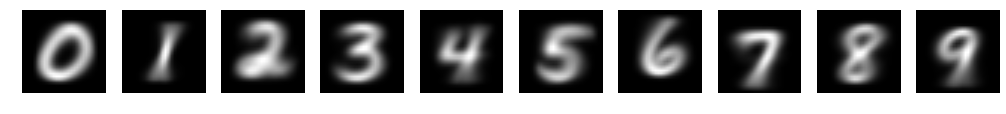

In [21]:
# Plot your means, note that is should be similar on to real smooth numbers
plot_grid(avarage_class_imgs, nrows=1, ncols=10)

## Code Matrix Based KNN

In [8]:
# Code matrix based KNN with L2 norn by feel MatrixBasedKNearestNeighbor class
# Use predict on to X_train[:100] only for debug

In [22]:
# KNN two loops

knn_clf_loop1 = MatrixBasedKNearestNeighbor(num_loops=2)
knn_clf_loop1 = knn_clf_loop1.fit(X_train, Y_train)
%time y_pred1 = knn_clf_loop1.predict(X_train[:100])

(20000, 784)
(100, 784)
CPU times: user 1min 5s, sys: 4 ms, total: 1min 5s
Wall time: 1min 5s


In [24]:
# KNN one loops

knn_clf_loop2 = MatrixBasedKNearestNeighbor(num_loops=1)
knn_clf_loop2 = knn_clf_loop2.fit(X_train, Y_train)
%time y_pred2 = knn_clf_loop2.predict(X_train[:100])

hello


ValueError: shapes (100,784) and (20000,784) not aligned: 784 (dim 1) != 20000 (dim 0)

In [11]:
#check yourself
print 'good' if np.linalg.norm(y_pred1 - y_pred2) < 1e-4 else 'fail'

good


In [12]:
# KNN no loops

knn_clf_loop3 = MatrixBasedKNearestNeighbor(num_loops=0)
knn_clf_loop3 = knn_clf_loop3.fit(X_train, Y_train)
%time y_pred3 = knn_clf_loop3.predict(X_train[:100])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 81.1 µs


In [13]:
#check yourself
print 'good' if np.linalg.norm(y_pred1 - y_pred3) < 1e-4 else 'fail'

good


## Code kd_tree based KNN

In [12]:
# KNN kd_tree

knn_clf_loop4 = KDBasedKNearestNeighbor()
knn_clf_loop4 = knn_clf_loop4.fit(X_train, Y_train)
%time y_pred4 = knn_clf_loop4.predict(X_train[:100])

NameError: name 'KDBasedKNearestNeighbor' is not defined

## Code Accuracy score and Cross Validation Prosses

In [15]:
# Accuracy

def accuracy(y_true, y_predict):
    score = 0.
    n = len(y_true)
    for i in range(n):
        score += (y_true[i] == y_predict[i])
    return score / n

In [16]:
print accuracy([1, 1, 1, 0], [1, 1, 1, 5])
print 'good' if accuracy([1, 1, 1, 0], [1, 1, 1, 5]) == 0.75 else 'fail'

0.75
good


In [2]:
# Cross validation

def cross_validation(X, y, metric, K=1, cv_fold=5):
    scores = []
    a = list(zip (X,y))
    np.random.shuffle(a)
    X = np.array([x for (x,y) in a])
    y = np.array([y for (x,y) in a])
    clf = KDBasedKNearestNeighbor()
    chunk_size = (len(X) + cv_fold - 1) // cv_fold
    for i in xrange(cv_fold):
        X_chunk = np.delete(X,range(i * chunk_size, (i + 1) * chunk_size), axis=0)
        y_chunk = np.delete(y,range(i * chunk_size, (i + 1) * chunk_size))
        clf.fit(X_chunk, y_chunk)
        prediction = clf.predict(X[i * chunk_size : (i + 1) * chunk_size, :], k = K)
        scores.append(metric(prediction, y[i * chunk_size : (i + 1) * chunk_size]))
    return np.mean(scores)

# Test prediction

In [24]:
TEST_DATA = pd.read_csv('full_test.csv')
TEST_DATA = np.array(TEST_DATA['label'])
def result_accuracy(y, n = len(TEST_DATA)):
    return accuracy(y[:n], TEST_DATA[:n])

In [66]:
test_data = pd.read_csv('test.csv')
X_test = np.array(test_data)

In [157]:
def E(r):
    return 0.75 * (1 - r ** 2) * (r <= 1)
def Q(r):
    return 15 / 16 * (1 - r ** 2) ** 2 * (r <= 1)
def T(r):
    return (1 - r) * (r <= 1)
def P(r):
    return 0.5 * (r <= 1)
def G(r):
    return e ** (-r ** 2 / 2) / (2 * pi) ** 0.5

In [143]:
#clf = KDBasedKNearestNeighbor()
#clf = clf.fit(X_train, Y_train)
#%time y_test_1_E = clf.predict(X_test, E, k = 1)
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_train, Y_train)
%time y_test_3_E = clf.predict(X_test, E, k = 3)
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_train, Y_train)
%time y_test_5_E = clf.predict(X_test, E, k = 5)

CPU times: user 1min 23s, sys: 80 ms, total: 1min 23s
Wall time: 1min 23s
CPU times: user 1min 20s, sys: 117 ms, total: 1min 20s
Wall time: 1min 20s


In [144]:
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_train, Y_train)
%time y_test_1_P = clf.predict(X_test, P, k = 1)
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_train, Y_train)
%time y_test_3_P = clf.predict(X_test, P, k = 3)
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_train, Y_train)
%time y_test_5_P = clf.predict(X_test, P, k = 5)

CPU times: user 1min 27s, sys: 76.7 ms, total: 1min 27s
Wall time: 1min 27s
CPU times: user 1min 46s, sys: 160 ms, total: 1min 47s
Wall time: 1min 47s
CPU times: user 1min 37s, sys: 10 ms, total: 1min 37s
Wall time: 1min 37s


In [145]:
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_train, Y_train)
%time y_test_1_Q = clf.predict(X_test, Q, k = 1)
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_train, Y_train)
%time y_test_3_Q = clf.predict(X_test, Q, k = 3)
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_train, Y_train)
%time y_test_5_Q = clf.predict(X_test, Q, k = 5)

CPU times: user 1min 41s, sys: 13.3 ms, total: 1min 41s
Wall time: 1min 41s
CPU times: user 1min 33s, sys: 90 ms, total: 1min 33s
Wall time: 1min 34s
CPU times: user 1min 52s, sys: 113 ms, total: 1min 52s
Wall time: 1min 53s


In [146]:
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_train, Y_train)
%time y_test_1_T = clf.predict(X_test, T, k = 1)
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_train, Y_train)
%time y_test_3_T = clf.predict(X_test, T, k = 3)
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_train, Y_train)
%time y_test_5_T = clf.predict(X_test, T, k = 5)

CPU times: user 1min 51s, sys: 190 ms, total: 1min 51s
Wall time: 1min 51s
CPU times: user 1min 51s, sys: 3.33 ms, total: 1min 51s
Wall time: 1min 52s
CPU times: user 1min 51s, sys: 6.67 ms, total: 1min 51s
Wall time: 1min 51s


In [155]:
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_train, Y_train)
%time y_test_7_E = clf.predict(X_test, E, k = 7)
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_train, Y_train)
%time y_test_7_P = clf.predict(X_test, P, k = 7)
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_train, Y_train)
%time y_test_7_T = clf.predict(X_test, T, k = 7)

CPU times: user 1min 24s, sys: 20 ms, total: 1min 24s
Wall time: 1min 24s
CPU times: user 1min 19s, sys: 523 ms, total: 1min 19s
Wall time: 1min 19s
CPU times: user 1min 23s, sys: 23.3 ms, total: 1min 23s
Wall time: 1min 23s


In [158]:
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_train, Y_train)
%time y_test_1_G = clf.predict(X_test, G, k = 1)
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_train, Y_train)
%time y_test_3_G = clf.predict(X_test, G, k = 3)
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_train, Y_train)
%time y_test_5_G = clf.predict(X_test, G, k = 5)
clf = KDBasedKNearestNeighbor()
clf = clf.fit(X_train, Y_train)
%time y_test_7_G = clf.predict(X_test, G, k = 7)

CPU times: user 1min 20s, sys: 3.33 ms, total: 1min 20s
Wall time: 1min 20s
CPU times: user 1min 26s, sys: 53.3 ms, total: 1min 26s
Wall time: 1min 26s
CPU times: user 1min 27s, sys: 20 ms, total: 1min 27s
Wall time: 1min 27s
CPU times: user 1min 52s, sys: 30 ms, total: 1min 52s
Wall time: 1min 52s


In [159]:
#print '%.4f'%result_accuracy(y_test_1_E), '%.4f'%result_accuracy(y_test_1_E, n = 100)
#print '%.4f'%result_accuracy(y_test_3_E), '%.4f'%result_accuracy(y_test_3_E, n = 100)
print '%.4f'%result_accuracy(y_test_5_E), '%.4f'%result_accuracy(y_test_5_E, n = 100)
print '%.4f'%result_accuracy(y_test_7_E), '%.4f'%result_accuracy(y_test_7_E, n = 100)
#print '%.4f'%result_accuracy(y_test_1_P), '%.4f'%result_accuracy(y_test_1_P, n = 100)
#print '%.4f'%result_accuracy(y_test_3_P), '%.4f'%result_accuracy(y_test_3_P, n = 100)
#print '%.4f'%result_accuracy(y_test_5_P), '%.4f'%result_accuracy(y_test_5_P, n = 100)
print '%.4f'%result_accuracy(y_test_7_P), '%.4f'%result_accuracy(y_test_7_P, n = 100)
#print '%.4f'%result_accuracy(y_test_1_T), '%.4f'%result_accuracy(y_test_1_T, n = 100)
#print '%.4f'%result_accuracy(y_test_3_T), '%.4f'%result_accuracy(y_test_3_T, n = 100)
#print '%.4f'%result_accuracy(y_test_5_T), '%.4f'%result_accuracy(y_test_5_T, n = 100)
print '%.4f'%result_accuracy(y_test_7_T), '%.4f'%result_accuracy(y_test_7_T, n = 100)
print '%.4f'%result_accuracy(y_test_1_G), '%.4f'%result_accuracy(y_test_1_G, n = 100)
print '%.4f'%result_accuracy(y_test_3_G), '%.4f'%result_accuracy(y_test_3_G, n = 100)
print '%.4f'%result_accuracy(y_test_5_G), '%.4f'%result_accuracy(y_test_5_G, n = 100)
print '%.4f'%result_accuracy(y_test_7_G), '%.4f'%result_accuracy(y_test_7_G, n = 100)

0.9412 0.9500
0.9408 0.9500
0.9348 0.9700
0.9412 0.9500
0.9316 0.9500
0.9356 0.9600
0.9384 0.9600
0.9356 0.9700


In [154]:
result = pd.DataFrame({'label':y_test_5_E})
result.to_csv('result_5_9412_E.csv', index_label = 'Id')